# P2: Project proposal and initial analyses
When you are done with Homework H1, you will continue to work on the next project milestone. In Milestone P2, together with your team members, you will agree on and refine your project proposal. Your first task is to select a project. Even though we provide the datasets for you to use, at this juncture, it is your responsibility to perform initial analyses and verify that what you propose is feasible given the data (including any additional data you might bring in yourself), which is crucial for the success of the project.

The goal of this milestone is to intimately acquaint yourself with the data, preprocess it, and complete all the necessary descriptive statistics tasks. We expect you to have a pipeline in place, fully documented in a notebook, and show us that you have clear project goals.

When describing the relevant aspects of the data, and any other datasets you may intend to use, you should in particular show (non-exhaustive list):

- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

We will evaluate this milestone according to how well these steps have been done and documented, the quality of the code and its documentation, the feasibility and critical awareness of the project. We will also evaluate this milestone according to how clear, reasonable, and well thought-through the project idea is. Please use the second milestone to really check with us that everything is in order with your project (idea, feasibility, etc.) before you advance too much with the final Milestone P3! There will be project office hours dedicated to helping you.

You will work in a public GitHub repository dedicated to your project, which can be created by following this link. The repository will automatically be named ada-2023-project-<your_team_name>. By the Milestone P2 deadline, each team should have a single public GitHub repo under the epfl-ada GitHub organization, containing the project proposal and initial analysis code.

## P2 deliverable (done as a team): GitHub repository with the following:

- Readme.md file containing the detailed project proposal (up to 1000 words). Your README.md should contain:
  - Title
  - bstract: A 150 word description of the project idea and goals. What’s the motivation behind your project? What story would you like to tell, and why?
  - Research Questions: A list of research questions you would like to address during the project.
  - Proposed additional datasets (if any): List the additional dataset(s) you want to use (if any), and some ideas on how you expect to get, manage, process, and enrich it/them. Show us that you’ve read the docs and some examples, and that you have a clear idea on what to expect. Discuss data size and format if relevant. It is your responsibility to check that what you propose is feasible.
  - Methods
  - Proposed timeline
  - Organization within the team: A list of internal milestones up until project Milestone P3.
  - Questions for TAs (optional): Add here any questions you have for us related to the proposed project.
- Notebook containing initial analyses and data handling pipelines. We will grade the correctness, quality of code, and quality of textual descriptions.


In [21]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data with the correct format
data_folder = '../Data'
paths_folder = data_folder + '/wikispeedia_paths-and-graph'

# Define the columns of each dataframe
columns_f = ['hashedIpAddress','timestamp','durationInSec','path','rating']
columns_u = ['hashedIpAddress','timestamp','durationInSec','path','target', 'type']

# Define the path to each dataframe
finished_paths = paths_folder + '/paths_finished.tsv'
unfinished_paths = paths_folder + '/paths_unfinished.tsv'

# Load the Data
df_success = pd.read_csv(finished_paths,comment='#',sep='\t',names=columns_f)
df_fail = pd.read_csv(unfinished_paths,comment='#',sep='\t',names=columns_u)

# Control
print('Finished Paths:')
display(df_success)

print('Unfinished Paths:')
display(df_fail)

Finished Paths:


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


Unfinished Paths:


,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


## Personal Notes
### Remarks
we notice the following:
- The number of finished paths is larger than the unfinished ones, may be people stop playing if they fail, but keep on playing if they succeed?
- There is an extra information with the unfinished paths, which is type. This value can be timeout or restart. The important thing to keep in mind here is, not all players giveup, maybe their battery was drained or they lost their connection. Also the 2 data frames do not have the same dimensions.

The failed paths dataset is parasited by games that were abandonned from the start. While one might consider that this might be the player giving up immediately and clicking off due to difficulty, we could also say it is because said player simply didn't *want* to play. It is simpler to just filter out all games that timed out within the first click.

As for those that ended in a restart, they're still valuable, as they might mean that the player is simply stuck, and we know the player *still wants to play.*

In [22]:
df_fail = df_fail[~((df_fail.type == 'timeout') &
                    (~df_fail['path'].str.contains(';')))].copy()   #find() returns -1 if not in str. Not finding a ; means player stayed at start
                                                                                                #Writing the inverse condition with a not is more clear
display(df_fail)

,hashedIpAddress,timestamp,durationInSec,path,target,type
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
5,131600803df4895e,1297100557,2009,Agriculture;History_of_the_world;China;Yangtze...,Grand_Canal_of_China,timeout
6,486bb79910fe9dd2,1297101660,1932,Mind;Christianity;Europe;Renaissance;Ancient_G...,Scouting,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


In [23]:
# change unix timestamp code to human readable
#df_success['timestamp'] = df_success['timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))
#df_fail['timestamp']    = df_fail['timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))


#TODO do this cell once, and figure out how to write it to a tsv in a clean format

In [24]:
paths_success = df_success.path.apply(lambda x: x.split(';')).copy()
df_fail.path = df_fail.path.map(str) + ';' + df_fail.target
paths_failed  = df_fail.path.apply(lambda x: x.split(';'))
paths_filtered_success = paths_success.apply(lambda x: x[0] +' -> '+ x[len(x)-1]).copy()
paths_filtered_fail = paths_failed.apply(lambda x: x[0] +' -> '+ x[len(x)-1]).copy()
paths_filtered_total = pd.concat([paths_filtered_success, paths_filtered_fail])

game_reps_total=paths_filtered_total.value_counts()
display(game_reps_total)
game_reps_success=paths_filtered_success.value_counts()
game_reps_fail = paths_filtered_fail.value_counts().head()

path
Brain -> Telephone                         1946
Asteroid -> Viking                         1722
Theatre -> Zebra                           1710
Pyramid -> Bean                            1544
Batman -> Wood                              217
                                           ... 
Abhidhamma_Pitaka -> Denver%2C_Colorado       1
Abhidhamma_Pitaka -> French_Guiana            1
Abhidhamma_Pitaka -> Neil_Armstrong           1
Abhidhamma_Pitaka -> Mozambique               1
Jamaica -> Alan_Turing                        1
Name: count, Length: 41521, dtype: int64

## Personal Notes
### Intermediate summary
- **Start:** we started from a not very clean dataset and we cleaned it
- **Current:** we then filtered the data and were able to extract some information such as the most and least played games
- **Goal:** we can now study these games and analyses the players this may (or may not) help us answer the following question: Does playing wikispeedia many times help the players improve?
- **Next:** to do so we will now analyse the players of the following games:
    - Asteroid -> Viking (AV)
    - Brain -> Telephone (BT)
    - Theatre -> Zebra (TZ)
    - Pyramid -> Bean (PB)

In [25]:
# Extract the DataFrames

AV = df_success[paths_filtered_success=='Asteroid -> Viking'].copy()
BT = df_success[paths_filtered_success=='Brain -> Telephone'].copy()
TZ = df_success[paths_filtered_success=='Theatre -> Zebra'].copy()
PB = df_success[paths_filtered_success=='Pyramid -> Bean'].copy()

# Find the players that played the game more than 'cutoff' times and the ones that only played once
cutoff = 5
lim = 2

# OGs
AV_OGs=AV.hashedIpAddress.value_counts()[AV.hashedIpAddress.value_counts()>=cutoff].index;
BT_OGs=BT.hashedIpAddress.value_counts()[BT.hashedIpAddress.value_counts()>=cutoff].index;
TZ_OGs=TZ.hashedIpAddress.value_counts()[TZ.hashedIpAddress.value_counts()>=cutoff].index;
PB_OGs=PB.hashedIpAddress.value_counts()[PB.hashedIpAddress.value_counts()>=cutoff].index;

# Noobs
AV_noob=AV.hashedIpAddress.value_counts()[AV.hashedIpAddress.value_counts()==lim].index;
BT_noob=BT.hashedIpAddress.value_counts()[BT.hashedIpAddress.value_counts()==lim].index;
TZ_noob=TZ.hashedIpAddress.value_counts()[TZ.hashedIpAddress.value_counts()==lim].index;
PB_noob=PB.hashedIpAddress.value_counts()[PB.hashedIpAddress.value_counts()==lim].index;

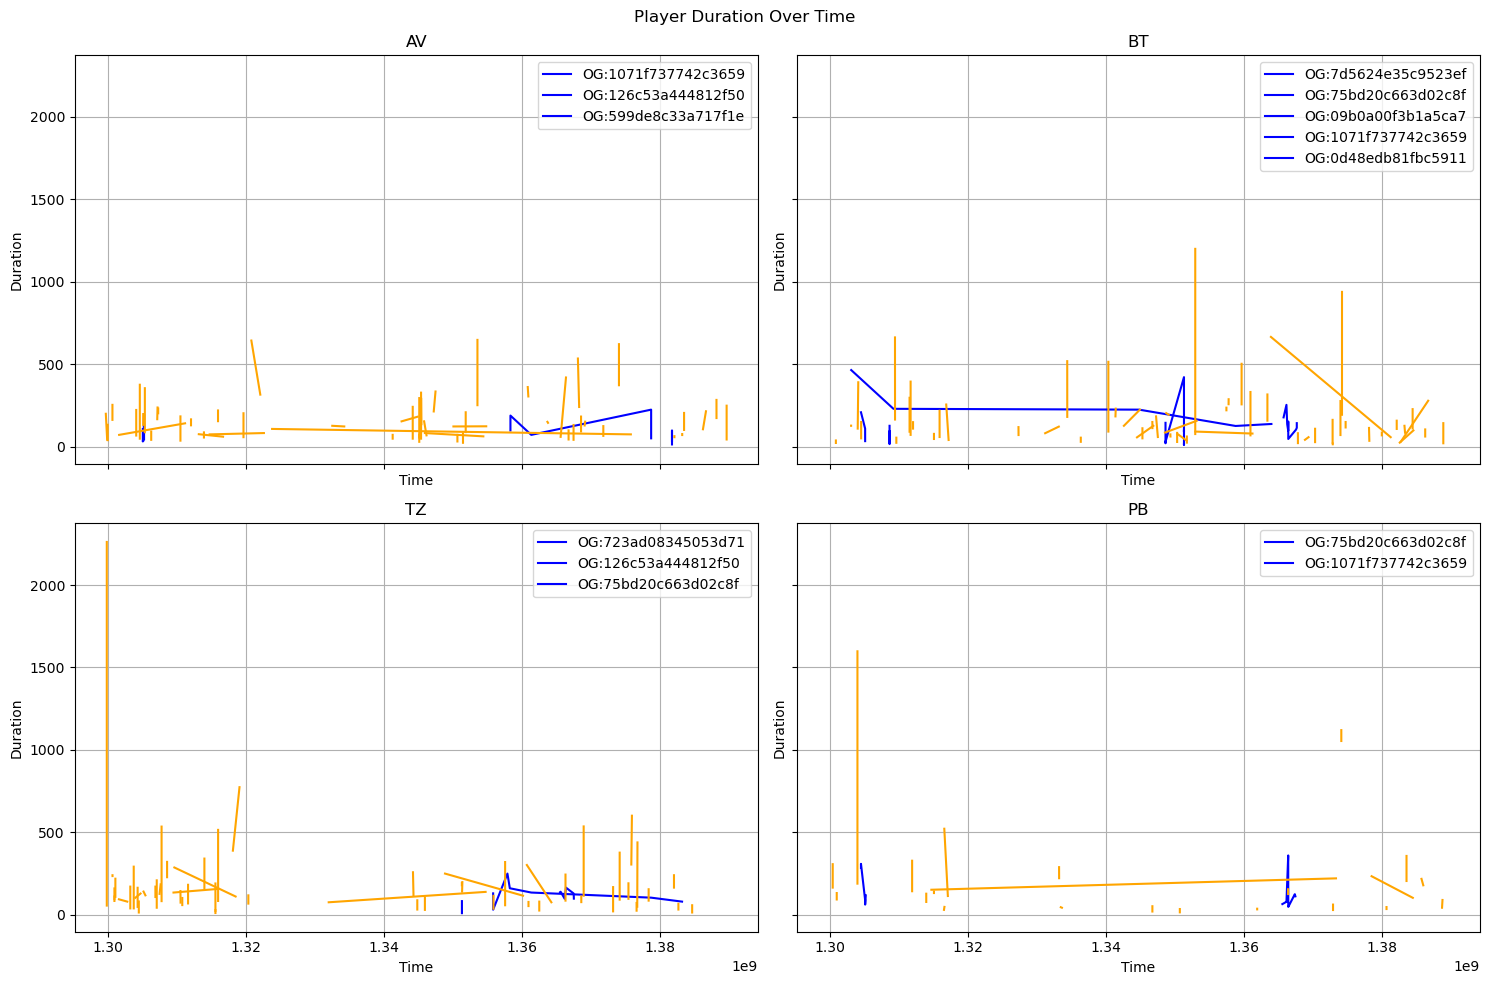

In [26]:
# Create subplots with shared x and y axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Player Duration Over Time')

# Plot for AV
axes[0, 0].set_title('AV')
for player in AV_OGs:
    axes[0, 0].plot(AV[AV.hashedIpAddress==player]['timestamp'], AV[AV.hashedIpAddress==player]['durationInSec'], color='blue', label='OG:'+player)
for player in AV_noob:
    axes[0, 0].plot(AV[AV.hashedIpAddress==player]['timestamp'], AV[AV.hashedIpAddress==player]['durationInSec'], color='orange')

axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Duration')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot for BT
axes[0, 1].set_title('BT')
for player in BT_OGs:
    axes[0, 1].plot(BT[BT.hashedIpAddress==player]['timestamp'], BT[BT.hashedIpAddress==player]['durationInSec'], color='blue', label='OG:'+player)
for player in BT_noob:
    axes[0, 1].plot(BT[BT.hashedIpAddress==player]['timestamp'], BT[BT.hashedIpAddress==player]['durationInSec'], color='orange')

axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Duration')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot for TZ
axes[1, 0].set_title('TZ')
for player in TZ_OGs:
    axes[1, 0].plot(TZ[TZ.hashedIpAddress==player]['timestamp'], TZ[TZ.hashedIpAddress==player]['durationInSec'], color='blue', label='OG:'+player)
for player in TZ_noob:
    axes[1, 0].plot(TZ[TZ.hashedIpAddress==player]['timestamp'], TZ[TZ.hashedIpAddress==player]['durationInSec'], color='orange')

axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Duration')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot for PB
axes[1, 1].set_title('PB')
for player in PB_OGs:
    axes[1, 1].plot(PB[PB.hashedIpAddress==player]['timestamp'], PB[PB.hashedIpAddress==player]['durationInSec'], color='blue', label='OG:'+player)
for player in PB_noob:
    axes[1, 1].plot(PB[PB.hashedIpAddress==player]['timestamp'], PB[PB.hashedIpAddress==player]['durationInSec'], color='orange')


axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Duration')
axes[1, 1].legend()
axes[1, 1].grid(True)
plt.tight_layout()
plt.show()

## Personal Notes
while at first the graph may look useless, we can actually see a few things. First of all, the OGs (in blue) which are the players that played the same game more than 5 times tend to be on the lower end of the duration so they can finish the game kind of fast. However, we see that most of the noobs (in orange) that played the same game only twice tend to have more or less the same duration. Further analysis is needed in order to asses if playing the same game again improves the player duration or not.

In addition to that, we notice that almost all users that played the same game more than once do it in almost the same timestamp and they have a negative slope. This suggests that the users play replay the game again. Maybe this is done to improve the personal record? Again, further analysis is needed to support these ideas

Finally, while there are some outliers. The size of the dataset is very small for the OGs (2-5) which is not representative at all so we need to study the data in another way. To do so, we extract the players that play the game alot in general and we try to compare how they did in comparison with the players that played the game once or twice. The difference this time is that we need to use all the games and not just the most played ones. The logic should be as follows:

- if I am a player that play wikispeedia alot and I play a new game I should on average perform better than a player that never played the game before

Let's see if a player played the wikispeedia more times before the 'top' game his/her level improves

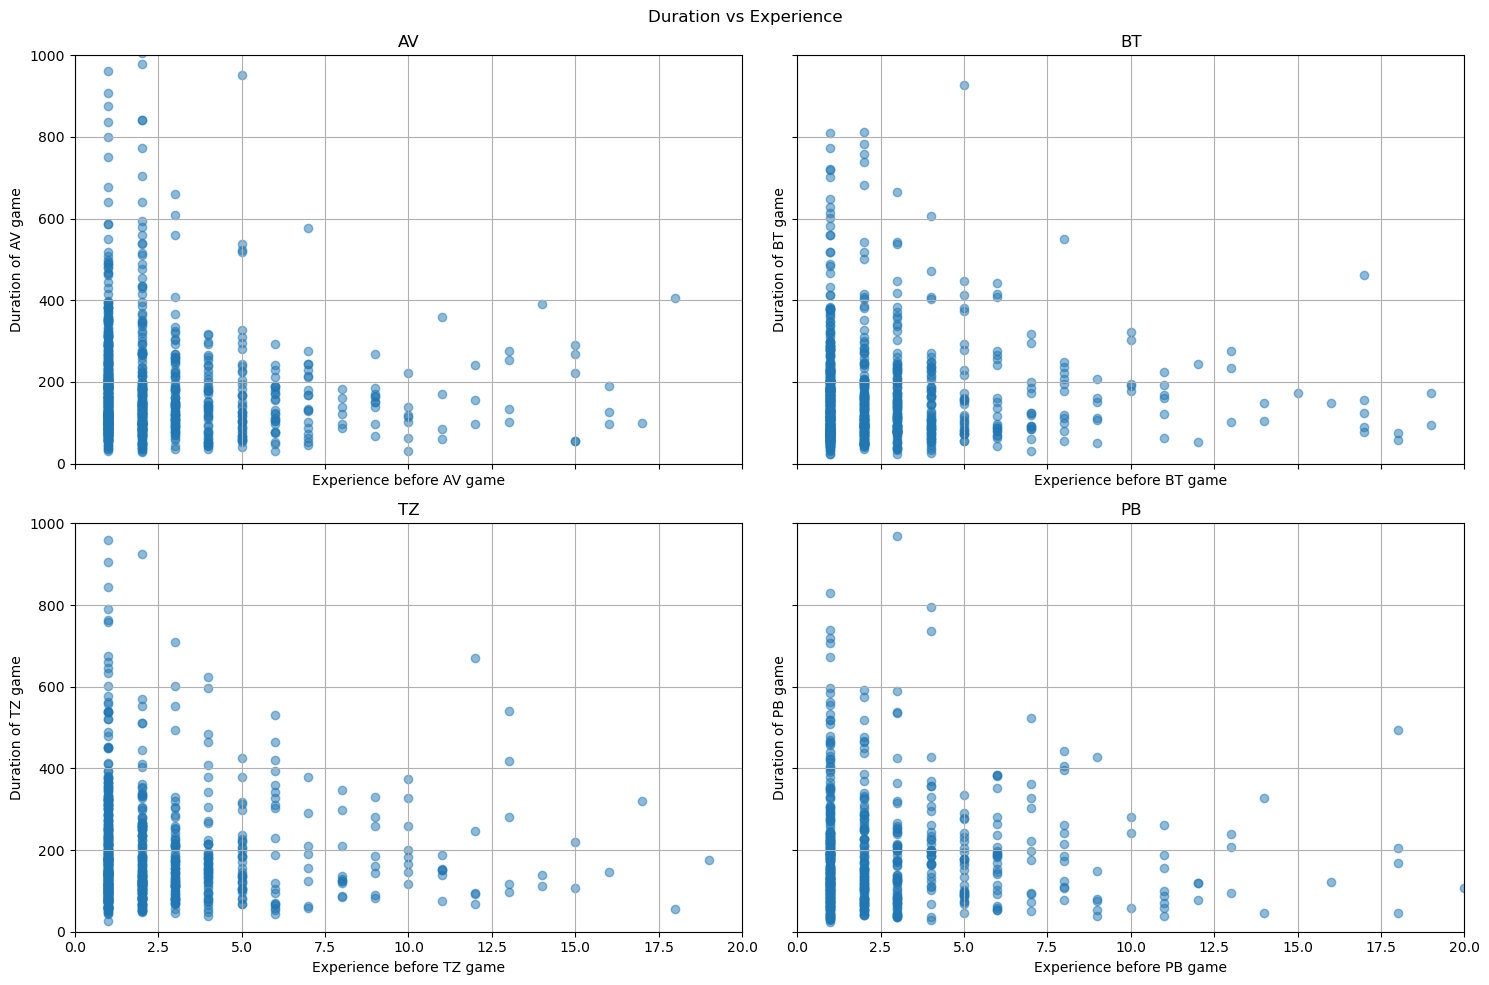

In [27]:
# First timers
AV_ft=AV.drop_duplicates(subset='hashedIpAddress',keep=False).copy()
BT_ft=BT.drop_duplicates(subset='hashedIpAddress',keep=False).copy()
TZ_ft=TZ.drop_duplicates(subset='hashedIpAddress',keep=False).copy()
PB_ft=PB.drop_duplicates(subset='hashedIpAddress',keep=False).copy()

df_success_filtered_AV = df_success[df_success.hashedIpAddress.isin(AV_ft.hashedIpAddress)].groupby('hashedIpAddress')
df_success_filtered_BT = df_success[df_success.hashedIpAddress.isin(BT_ft.hashedIpAddress)].groupby('hashedIpAddress')
df_success_filtered_TZ = df_success[df_success.hashedIpAddress.isin(TZ_ft.hashedIpAddress)].groupby('hashedIpAddress')
df_success_filtered_PB = df_success[df_success.hashedIpAddress.isin(PB_ft.hashedIpAddress)].groupby('hashedIpAddress')

experience_AV = pd.DataFrame(columns=('hashedIpAddress', 'Experience before AV game', 'Duration of AV game'))
experience_BT = pd.DataFrame(columns=('hashedIpAddress', 'Experience before BT game', 'Duration of BT game'))
experience_TZ = pd.DataFrame(columns=('hashedIpAddress', 'Experience before TZ game', 'Duration of TZ game'))
experience_PB = pd.DataFrame(columns=('hashedIpAddress', 'Experience before PB game', 'Duration of PB game'))

for user,data in df_success_filtered_AV:
    time_of_playing_AV = AV_ft[AV_ft.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_AV])
    user_game_duration = AV_ft[AV_ft.hashedIpAddress==user].durationInSec.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before AV game': [number_of_games_before], 'Duration of AV game': [user_game_duration]})
    experience_AV=pd.concat([experience_AV,new_row],ignore_index=True)

for user,data in df_success_filtered_BT:
    time_of_playing_BT = BT_ft[BT_ft.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_BT])
    user_game_duration = BT_ft[BT_ft.hashedIpAddress==user].durationInSec.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before BT game': [number_of_games_before], 'Duration of BT game': [user_game_duration]})
    experience_BT=pd.concat([experience_BT,new_row],ignore_index=True)

for user,data in df_success_filtered_TZ:
    time_of_playing_TZ = TZ_ft[TZ_ft.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_TZ])
    user_game_duration = TZ_ft[TZ_ft.hashedIpAddress==user].durationInSec.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before TZ game': [number_of_games_before], 'Duration of TZ game': [user_game_duration]})
    experience_TZ=pd.concat([experience_TZ,new_row],ignore_index=True)

for user,data in df_success_filtered_PB:
    time_of_playing_PB = PB_ft[PB_ft.hashedIpAddress==user].timestamp.values[0].astype(int)
    number_of_games_before = len(data[data.timestamp<=time_of_playing_PB])
    user_game_duration = PB_ft[PB_ft.hashedIpAddress==user].durationInSec.values[0].astype(int)
    new_row = pd.DataFrame({'hashedIpAddress': [user], 'Experience before PB game': [number_of_games_before], 'Duration of PB game': [user_game_duration]})
    experience_PB=pd.concat([experience_PB,new_row],ignore_index=True)


# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Duration vs Experience')

# Scatter plot for AV
axes[0, 0].scatter(experience_AV['Experience before AV game'], experience_AV['Duration of AV game'], alpha=0.5)
axes[0, 0].set_title('AV')
axes[0, 0].set_xlabel('Experience before AV game')
axes[0, 0].set_ylabel('Duration of AV game')
axes[0, 0].grid(True)
axes[0, 0].set_ylim(0, 1000)
axes[0, 0].set_xlim(0, 20)

# Scatter plot for BT
axes[0, 1].scatter(experience_BT['Experience before BT game'], experience_BT['Duration of BT game'], alpha=0.5)
axes[0, 1].set_title('BT')
axes[0, 1].set_xlabel('Experience before BT game')
axes[0, 1].set_ylabel('Duration of BT game')
axes[0, 1].grid(True)
axes[0, 1].set_ylim(0, 1000)
axes[0, 1].set_xlim(0, 20)

# Scatter plot for TZ
axes[1, 0].scatter(experience_TZ['Experience before TZ game'], experience_TZ['Duration of TZ game'], alpha=0.5)
axes[1, 0].set_title('TZ')
axes[1, 0].set_xlabel('Experience before TZ game')
axes[1, 0].set_ylabel('Duration of TZ game')
axes[1, 0].grid(True)
axes[1, 0].set_ylim(0, 1000)
axes[1, 0].set_xlim(0, 20)

# Scatter plot for PB
axes[1, 1].scatter(experience_PB['Experience before PB game'], experience_PB['Duration of PB game'], alpha=0.5)
axes[1, 1].set_title('PB')
axes[1, 1].set_xlabel('Experience before PB game')
axes[1, 1].set_ylabel('Duration of PB game')
axes[1, 1].grid(True)
axes[1, 1].set_ylim(0, 1000)
axes[1, 1].set_xlim(0, 20)

plt.tight_layout()
plt.show()

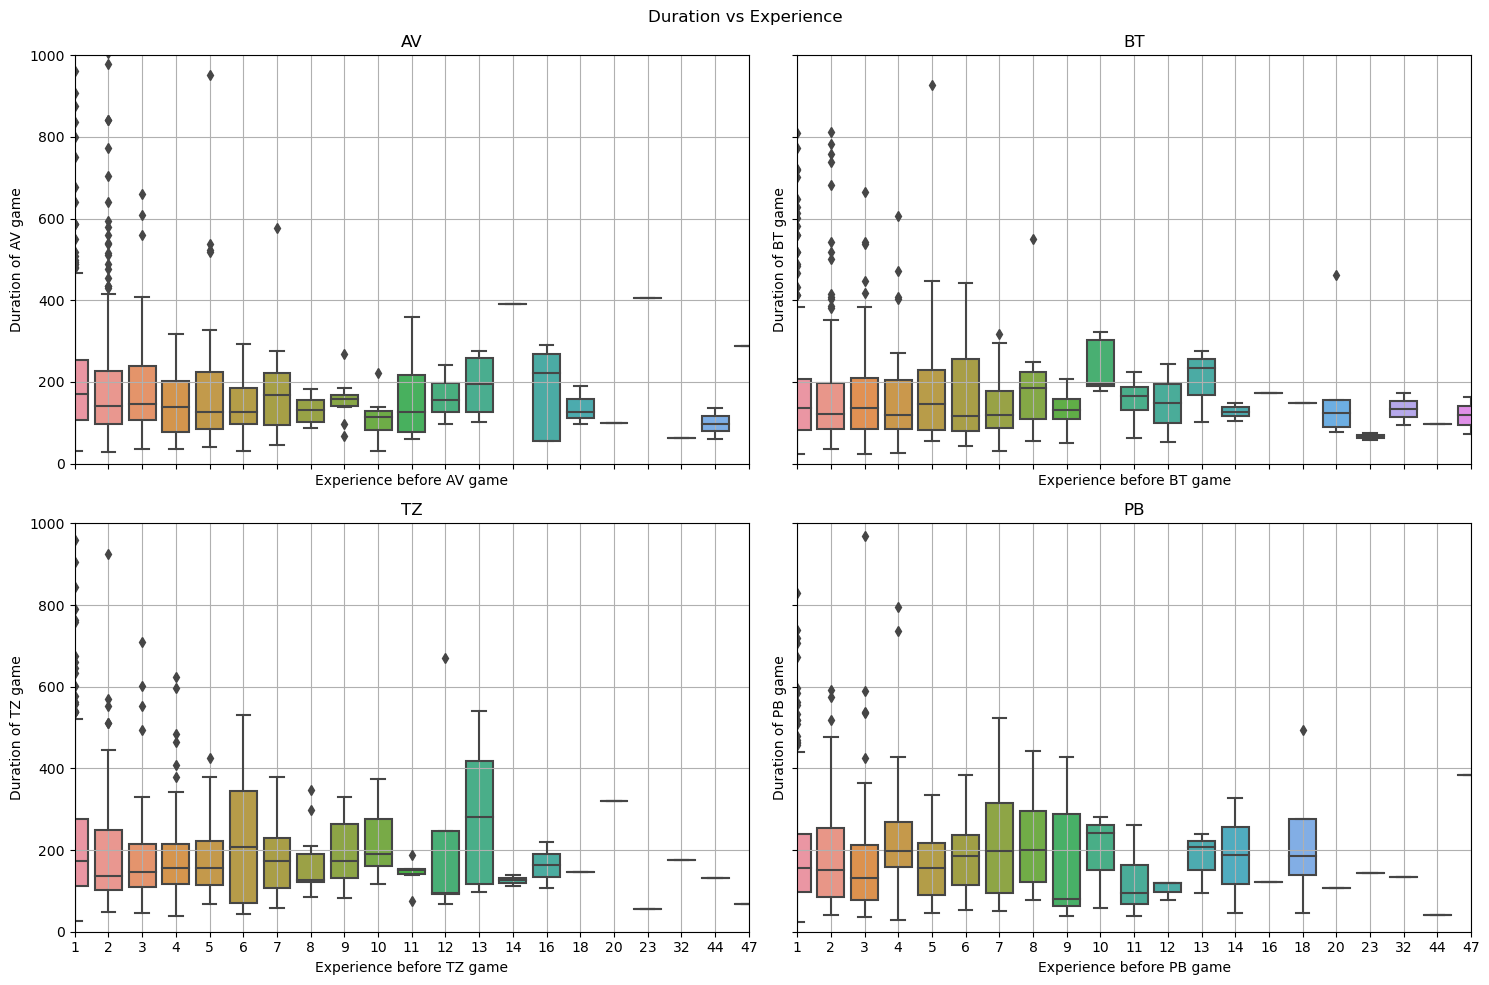

In [42]:
import seaborn as sns

# Convert columns to numeric
experience_AV['Experience before AV game'] = pd.to_numeric(experience_AV['Experience before AV game'])
experience_AV['Duration of AV game'] = pd.to_numeric(experience_AV['Duration of AV game'])

experience_BT['Experience before BT game'] = pd.to_numeric(experience_BT['Experience before BT game'])
experience_BT['Duration of BT game'] = pd.to_numeric(experience_BT['Duration of BT game'])

experience_TZ['Experience before TZ game'] = pd.to_numeric(experience_TZ['Experience before TZ game'])
experience_TZ['Duration of TZ game'] = pd.to_numeric(experience_TZ['Duration of TZ game'])

experience_PB['Experience before PB game'] = pd.to_numeric(experience_PB['Experience before PB game'])
experience_PB['Duration of PB game'] = pd.to_numeric(experience_PB['Duration of PB game'])

# Visualize with boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Duration vs Experience')

# Box plot for AV
sns.boxplot(x=experience_AV['Experience before AV game'], y=experience_AV['Duration of AV game'], ax=axes[0, 0])
axes[0, 0].set_title('AV')
axes[0, 0].set_xlabel('Experience before AV game')
axes[0, 0].set_ylabel('Duration of AV game')
axes[0, 0].grid(True)
axes[0, 0].set_ylim(0, 1000)
axes[0, 0].set_xlim(0, 20)

# Box plot for BT
sns.boxplot(x=experience_BT['Experience before BT game'], y=experience_BT['Duration of BT game'], ax=axes[0, 1])
axes[0, 1].set_title('BT')
axes[0, 1].set_xlabel('Experience before BT game')
axes[0, 1].set_ylabel('Duration of BT game')
axes[0, 1].grid(True)
axes[0, 1].set_ylim(0, 1000)
axes[0, 1].set_xlim(0, 20)

# Box plot for TZ
sns.boxplot(x=experience_TZ['Experience before TZ game'], y=experience_TZ['Duration of TZ game'], ax=axes[1, 0])
axes[1, 0].set_title('TZ')
axes[1, 0].set_xlabel('Experience before TZ game')
axes[1, 0].set_ylabel('Duration of TZ game')
axes[1, 0].grid(True)
axes[1, 0].set_ylim(0, 1000)
axes[1, 0].set_xlim(0, 20)

# Box plot for PB
sns.boxplot(x=experience_PB['Experience before PB game'], y=experience_PB['Duration of PB game'], ax=axes[1, 1])
axes[1, 1].set_title('PB')
axes[1, 1].set_xlabel('Experience before PB game')
axes[1, 1].set_ylabel('Duration of PB game')
axes[1, 1].grid(True)
axes[1, 1].set_ylim(0, 1000)
axes[1, 1].set_xlim(0, 20)

plt.tight_layout()
plt.show()

## Personal Notes
- we can clearly see that the more experience a player had before a game the less time it took him/her to finish the AV,BT,TZ and PB games
- We seam to have a powerlaw but this is to be proved by further analysis
- using the box plots however did show that on average the player do not become faster